In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from scipy import signal
from math import exp
import processes.foundation as fd
from math import exp, sqrt, pi, erfc
from lmfit import Model
import csv
from scipy.optimize import curve_fit

In [6]:
def line(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

In [3]:
run_list = 1363
data = fd.get_t1_data(run_list, "Card1")


In [4]:
wave = data[0]["waveform"]["values"].nda[0]

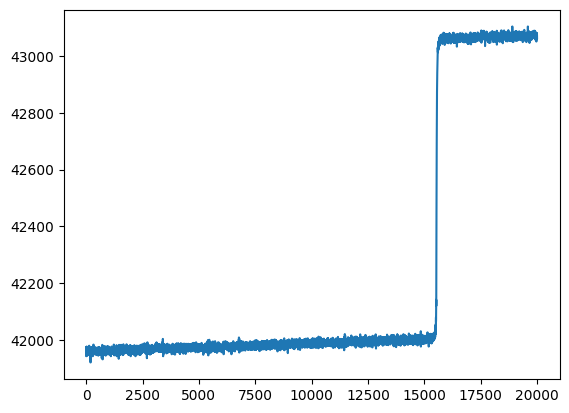

In [5]:
plt.plot(wave)

In [9]:
xdata = np.arange(0,15000,1)
popt, pcov = curve_fit(line, xdata, wave[0:15000])

In [12]:
x = popt[0] #adc/clock ticks
m = 0.0408625 #kev/adc
b = -0.16892 #kev
amp = 6.241509 * pow(10,18)
eV_per_ns = (1000. * m)*x + (1000./8)*pow(10,-9)*b
e_per_ns = eV_per_ns / 2.9
e_per_s = e_per_ns * pow(10,9)
pA = (e_per_s / amp) * pow(10,12)
pA

6.449661648862986

(10.0, 17800.0)

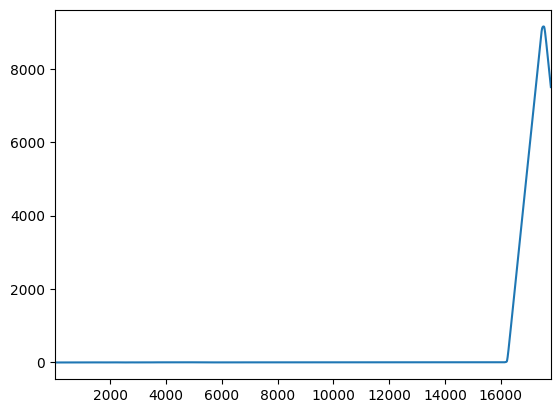

In [19]:
trap = t2_data[0]["wf_trap"]["values"].nda[5]
plt.plot(trap)
plt.xlim(10,17800)

In [23]:
df = pd.DataFrame(t2_data[0]["wf_trap"]["values"].nda)

In [41]:
col = [x for x in range(17500,17550)]
df["trapEmax"] = df[col].mean(axis=1)

In [47]:
c = 0.0408625
m = -0.16892
energy = [x*c + m for x in df["trapEmax"]]

(56.0, 58.0)

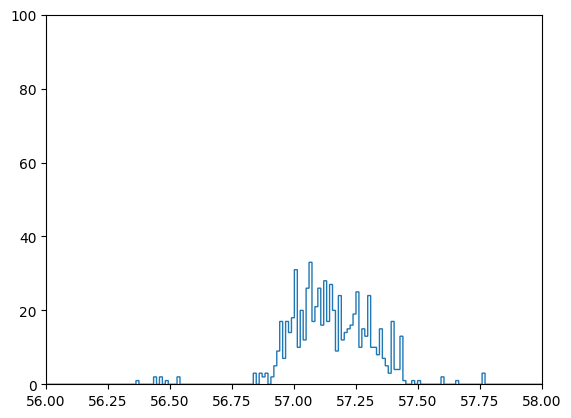

In [56]:
plt.hist(energy, histtype="step", bins=320000)
plt.ylim(0,100)
plt.xlim(56,58)

In [58]:
c = 0.0408625
m = -0.16892
energy = []
run_list = [x for x in range(8662,8684)]
for run in run_list:
    t2_data = fd.get_t2_data(run, "Card1")
    df = pd.DataFrame(t2_data[0]["wf_trap"]["values"].nda)
    col = [x for x in range(17500,17550)]
    df["trapEmax"] = df[col].mean(axis=1)
    hold = [x*c + m for x in df["trapEmax"]]
    energy.append(hold)

In [59]:
flatEnergy = list(np.concatenate(energy).flat)

In [6]:
plt.hist(flatEnergy, histtype="step", bins=640000)
plt.ylim(0,400)
plt.xlim(56.75,57.10)

NameError: name 'flatEnergy' is not defined

In [7]:
run_list = [x for x in range(8811,8879)]
t2_data = fd.get_df_multiple(run_list, "Card1")
print(t2_data)

        channel        timestamp  startEnergy   maxEnergy      trapEmax
0             0   22387654698509    134227723          38    626.191467
1             0   22387654943835    134227475  4294967267   5352.035645
2             0   22387655007066    134227559          31  12494.342773
3             0   22387654943835    134227475  4294967267   5352.035645
4             0   22387655007066    134227559          31  12494.342773
...         ...              ...          ...         ...           ...
588504        0   22660360223262    134227547  4294967261   3942.781982
588505        0   22660360223262    134227547  4294967261   3942.781982
588506        0   22660359007878    134227660  4294967254    844.041626
588507        0   22660359070417    134227558  4294967283   6238.643066
588508        0  161806772310837   4294967295  4294967295      0.000000

[588509 rows x 5 columns]


In [16]:

run_list = [x for x in range(2,21)]
t2_data = fd.get_df_multiple(run_list, "Card1")
#run = 1
#t2_data = fd.get_df(run, "Card1")
c = 0.0408625
m = -0.16892
t2_data["calEnergy"] = t2_data["trapEmax"]*c + m 

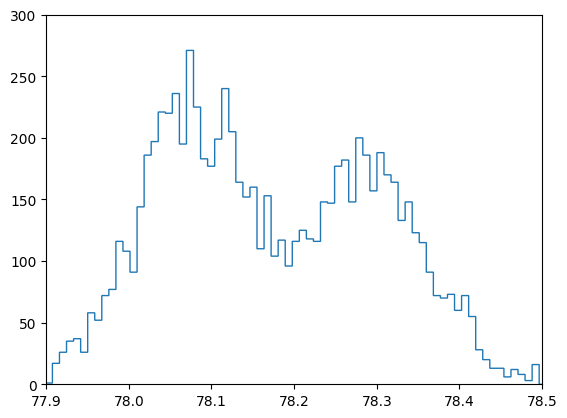

In [18]:
plt.hist(t2_data["calEnergy"], histtype="step", bins=300000)
plt.xlim(77.9,78.5)
plt.ylim(0,300)
plt.show()

In [4]:
 #plt.subplot(1,2,2)
plt.hist(t2_data['calEnergy'], histtype="step", bins = 320000)
plt.xlim(50,60)
plt.ylim(0,400)
plt.show()

NameError: name 't2_data' is not defined

In [23]:
mask1 = (t2_data["calEnergy"] > 58.0)
mask2 = (t2_data["calEnergy"] < 58.3)
idxLower = t2_data[mask1].index.values
idxHigher = t2_data[mask2].index.values
idxFirst = [i for i in idxLower if i in idxHigher]

mask1 = (t2_data["calEnergy"] > 58.3)
mask2 = (t2_data["calEnergy"] < 58.7)
idxLower = t2_data[mask1].index.values
idxHigher = t2_data[mask2].index.values
idxSecond = [i for i in idxLower if i in idxHigher]

In [24]:
t1_data = fd.get_t1_data(8662, "Card1")

In [36]:
n = 3
wf1 = t1_data[0]["waveform"]["values"].nda[idxFirst[n]]
wf2 = t1_data[0]["waveform"]["values"].nda[idxSecond[n]]

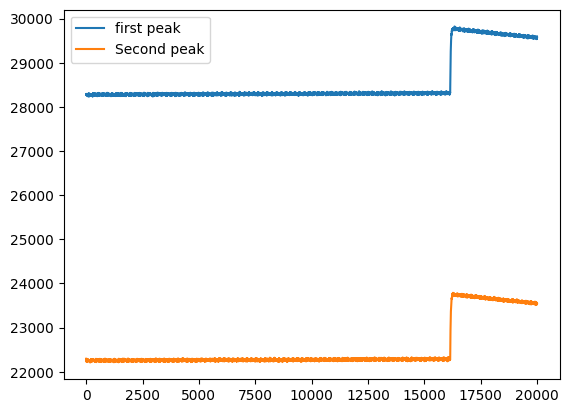

In [37]:
plt.plot(wf1, label="first peak")
plt.plot(wf2, label="Second peak")
plt.legend()
plt.show()

1585


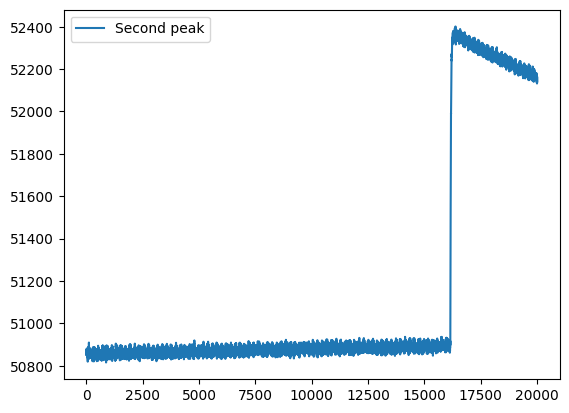

In [52]:
wf2 = t1_data[0]["waveform"]["values"].nda[idxSecond[6]]
print(max(wf2)-min(wf2))
plt.plot(wf2, label="Second peak")
plt.legend()
plt.show()

1567


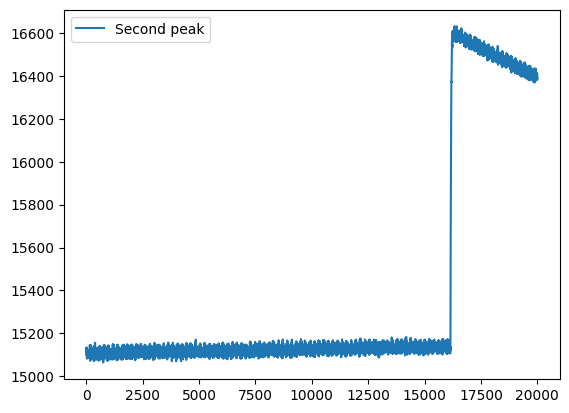

In [55]:
wf1 = t1_data[0]["waveform"]["values"].nda[idxFirst[1]]
print(max(wf1)-min(wf1))
plt.plot(wf1, label="Second peak")
plt.legend()
plt.show()